In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix, classification_report

In [65]:
positive_dir_train = Path('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\train\\Positive')
negative_dir_train = Path('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\train\\Negative')
positive_dir_valid = Path('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\valid\\Positive')
negative_dir_valid = Path('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\valid\\Negative')
positive_dir_test = Path('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\test\\Positive')
negative_dir_test = Path('C:\\Users\\shvmt\Documents\\GitHub\\eduTech-Hackathon\\test\\Negative')

In [66]:
def pathDf(dirPath, label):
    filepaths = pd.Series(list(dirPath.glob(r'*.jpg')), name='Filepath').astype(str)
    labels = pd.Series(label, name='Label', index=filepaths.index)
    df = pd.concat([filepaths, labels], axis=1)
    return df

In [67]:
p_train_df = pathDf(positive_dir_train, label='P')
n_train_df = pathDf(negative_dir_train, label='N')
p_val_df = pathDf(positive_dir_valid, label='P')
n_val_df = pathDf(negative_dir_valid, label='N')
p_test_df = pathDf(positive_dir_test, label='P')
n_test_df = pathDf(negative_dir_test, label='N')

In [68]:
df_train = pd.concat([p_train_df, n_train_df], axis=0).reset_index(drop=True)
df_val = pd.concat([p_val_df, n_val_df], axis=0).reset_index(drop=True)
df_test = pd.concat([p_test_df, n_test_df], axis=0).reset_index(drop=True)

In [69]:
df_train

,Filepath,Label
0,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
1,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
2,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
3,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
4,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
...,...,...
595,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
596,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
597,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
598,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N


In [70]:
df_val

,Filepath,Label
0,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
1,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
2,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
3,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
4,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
...,...,...
195,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
196,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
197,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
198,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N


In [71]:
df_test

,Filepath,Label
0,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
1,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
2,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
3,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
4,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,P
...,...,...
195,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
196,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
197,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N
198,C:\Users\shvmt\Documents\GitHub\eduTech-Hackat...,N


In [115]:
datagen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    rescale=1./255)

datagen_test = ImageDataGenerator(
    rescale=1./255)

callback1 = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.005,
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

callback2 = EarlyStopping(
    monitor='accuracy',
    min_delta=0.005,
    patience=10,
    verbose=1,
    mode='auto',
    restore_best_weights=True)

callback3 = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True)

In [109]:
train_data = datagen.flow_from_dataframe(
    df_train,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (120, 120),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 7)

val_data = datagen.flow_from_dataframe(
    df_val,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (120, 120),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = True,
    seed = 7)

test_data = datagen_test.flow_from_dataframe(
    df_val,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (120, 120),
    color_mode = 'rgb',
    class_mode = 'binary',
    batch_size = 32,
    shuffle = False,
    seed = 7)

Found 600 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [96]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=3, activation='relu', input_shape=(120, 120, 3)))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(GlobalAveragePooling2D())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 59, 59, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 28, 28, 32)       0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_11  (None, 32)               0         
  (GlobalAveragePooling2D)                                       
                                                     

In [114]:
def plotVals(history):
    plt.plot(history.history['val_accuracy'], label='val_acc')
    plt.plot(history.history['accuracy'], label='acc')
    plt.legend()

In [97]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [142]:
history = model.fit(train_data, validation_data=val_data, epochs=100, callbacks = [callback1])

Epoch 1/100
19/19 [==============================] - 6s 336ms/step - loss: 0.4337 - accuracy: 0.8367 - val_loss: 0.3338 - val_accuracy: 0.8900
Epoch 2/100
19/19 [==============================] - 5s 235ms/step - loss: 0.4144 - accuracy: 0.8217 - val_loss: 0.3125 - val_accuracy: 0.9150
Epoch 3/100
19/19 [==============================] - 4s 218ms/step - loss: 0.4366 - accuracy: 0.8100 - val_loss: 0.3375 - val_accuracy: 0.8850
Epoch 4/100
19/19 [==============================] - 4s 218ms/step - loss: 0.4508 - accuracy: 0.8267 - val_loss: 0.3274 - val_accuracy: 0.9200
Epoch 5/100
19/19 [==============================] - 5s 259ms/step - loss: 0.4337 - accuracy: 0.8300 - val_loss: 0.3444 - val_accuracy: 0.9200
Epoch 6/100
19/19 [==============================] - 5s 238ms/step - loss: 0.4296 - accuracy: 0.8083 - val_loss: 0.3489 - val_accuracy: 0.9050
Epoch 7/100
19/19 [==============================] - 4s 223ms/step - loss: 0.4398 - accuracy: 0.8117 - val_loss: 0.3667 - val_accuracy: 0.9000

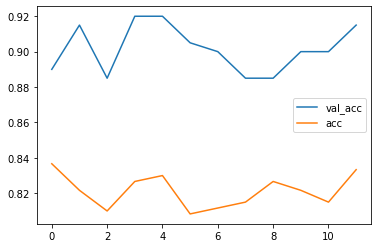

In [143]:
plotVals(history)

In [144]:
y_pred1 = [np.argmax(i) for i in model.predict(test_data)]

In [145]:
print(classification_report(y_pred1, test_data.labels))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       115
           1       0.83      0.98      0.90        85

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.92      0.91      0.91       200



In [146]:
history2 = model.fit(train_data, validation_data=val_data, epochs=100, callbacks = [callback2])

Epoch 1/100
19/19 [==============================] - 5s 277ms/step - loss: 0.4410 - accuracy: 0.8217 - val_loss: 0.3189 - val_accuracy: 0.9450
Epoch 2/100
19/19 [==============================] - 5s 248ms/step - loss: 0.4260 - accuracy: 0.8167 - val_loss: 0.3414 - val_accuracy: 0.9100
Epoch 3/100
19/19 [==============================] - 5s 254ms/step - loss: 0.4173 - accuracy: 0.8283 - val_loss: 0.3500 - val_accuracy: 0.9000
Epoch 4/100
19/19 [==============================] - 4s 235ms/step - loss: 0.4114 - accuracy: 0.8350 - val_loss: 0.3222 - val_accuracy: 0.9000
Epoch 5/100
19/19 [==============================] - 5s 249ms/step - loss: 0.4190 - accuracy: 0.8200 - val_loss: 0.3676 - val_accuracy: 0.8950
Epoch 6/100
19/19 [==============================] - 4s 237ms/step - loss: 0.4230 - accuracy: 0.8233 - val_loss: 0.3565 - val_accuracy: 0.8900
Epoch 7/100
19/19 [==============================] - 4s 226ms/step - loss: 0.4249 - accuracy: 0.8200 - val_loss: 0.3482 - val_accuracy: 0.9200

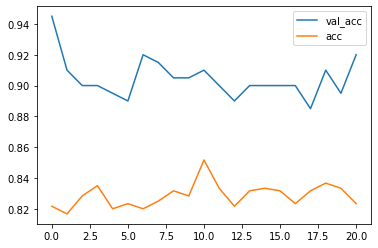

In [147]:
plotVals(history2)

In [148]:
y_pred2 = [np.argmax(i) for i in model.predict(test_data)]

In [152]:
print(classification_report(y_pred2, test_data.labels))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       114
           1       0.84      0.98      0.90        86

    accuracy                           0.91       200
   macro avg       0.91      0.92      0.91       200
weighted avg       0.92      0.91      0.91       200



In [149]:
history3 = model.fit(train_data, validation_data=val_data, epochs=100, callbacks = [callback3])

Epoch 1/100
19/19 [==============================] - 5s 238ms/step - loss: 0.4304 - accuracy: 0.8150 - val_loss: 0.3386 - val_accuracy: 0.8900
Epoch 2/100
19/19 [==============================] - 4s 225ms/step - loss: 0.4340 - accuracy: 0.8233 - val_loss: 0.3539 - val_accuracy: 0.9100
Epoch 3/100
19/19 [==============================] - 4s 238ms/step - loss: 0.4276 - accuracy: 0.8283 - val_loss: 0.3342 - val_accuracy: 0.9050
Epoch 4/100
19/19 [==============================] - 4s 226ms/step - loss: 0.4237 - accuracy: 0.8367 - val_loss: 0.3143 - val_accuracy: 0.9050
Epoch 5/100
19/19 [==============================] - 4s 219ms/step - loss: 0.4258 - accuracy: 0.8250 - val_loss: 0.3318 - val_accuracy: 0.9100
Epoch 6/100
19/19 [==============================] - 4s 218ms/step - loss: 0.4096 - accuracy: 0.8183 - val_loss: 0.3467 - val_accuracy: 0.9000
Epoch 7/100
19/19 [==============================] - 4s 221ms/step - loss: 0.4140 - accuracy: 0.8383 - val_loss: 0.3366 - val_accuracy: 0.9350

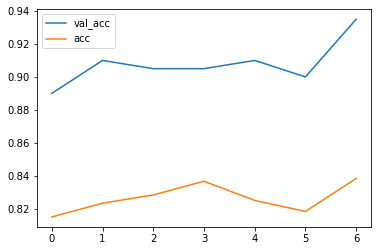

In [151]:
plotVals(history3)

In [153]:
y_pred3 = [np.argmax(i) for i in model.predict(test_data)]

In [154]:
print(classification_report(y_pred3, test_data.labels))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92       112
           1       0.86      0.98      0.91        88

    accuracy                           0.92       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.92      0.92       200

